In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Air quality dataset preprocessing

In [2]:
air = pd.read_csv("../datasets/air_quality/AirQualityUCI.csv", sep=';')
air.shape

(9471, 17)

In [3]:
air.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [4]:
air_clean = air.iloc[:,:-2]
air_clean.iloc[9357:,:].isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [5]:
air_clean = air_clean.iloc[:9357,:]
air_clean.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [6]:
air_clean.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [7]:
# Changing data types to number format

air_clean.replace(',','.', inplace=True, regex=True)
for column in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    air_clean[column] = air_clean[column].astype("float64")
air_clean['date'] = air_clean['Date'] + ' ' + air_clean['Time'].str.replace('.', ':')
air_clean['date'] = pd.to_datetime(air_clean['date'], format='%d/%m/%Y %H:%M:%S')
air_clean.drop(columns=['Date', 'Time'], inplace=True)
air_clean = air_clean[["date"] + list(air_clean.columns)[:-1]]
air_clean.rename(columns={air_clean.columns[-1]: 'OT'}, inplace=True)
air_clean.dtypes

/var/folders/lp/0n93b1qs0q7b31qkz96byfp00000gp/T/ipykernel_75496/2150103249.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_clean['date'] = air_clean['Date'] + ' ' + air_clean['Time'].str.replace('.', ':')


date             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
OT                      float64
dtype: object

In [8]:
# NaNs are coded as -200.0

air_clean = air_clean.replace(-200, np.nan)
air_clean.isna().sum()

date                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
OT                366
dtype: int64

In [9]:
# Creating dataset without NaNs

air_clean = air_clean.drop(columns=["NMHC(GT)", "CO(GT)", "NOx(GT)", "NO2(GT)"]).dropna()
air_clean.shape

(8991, 10)

# Final datasets

In [10]:
air_quality = air_clean.copy()
exchange = pd.read_csv("../datasets/exchange_rate/exchange_rate.csv")
electricity = pd.read_csv("../datasets/electricity/electricity.csv")
weather = pd.read_csv("../datasets/weather/weather.csv")

In [11]:
electricity.shape, weather.shape, air_quality.shape, exchange.shape

((26304, 322), (52696, 22), (8991, 10), (7588, 9))

In [12]:
electricity.isna().sum().sum(), weather.isna().sum().sum(), air_quality.isna().sum().sum(), exchange.isna().sum().sum()

(0, 0, 0, 0)

In [13]:
weather.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),52696.0,989.989233,9.207149,955.58,984.8000,990.92,995.9300,1020.07
T (degC),52696.0,10.818241,7.468671,-6.44,4.5900,10.23,16.1800,34.80
Tpot (K),52696.0,284.796938,7.616995,266.19,278.5500,284.32,290.2600,309.13
Tdew (degC),52696.0,5.409105,5.956722,-13.81,0.7775,5.26,9.7000,20.50
rh (%),52696.0,72.487133,19.230260,21.16,58.8200,75.40,87.9000,100.00
VPmax (mbar),52696.0,14.487046,7.632960,3.77,8.4800,12.48,18.4200,55.67
VPact (mbar),52696.0,9.676828,4.023504,2.09,6.4600,8.89,12.0500,24.16
VPdef (mbar),52696.0,4.810131,5.539320,0.00,1.1700,2.74,6.4400,42.10
sh (g/kg),52696.0,6.111159,2.561536,1.30,4.0700,5.61,7.6200,15.40
H2OC (mmol/mol),52696.0,9.782341,4.082684,2.09,6.5300,8.99,12.2000,24.53


/var/folders/lp/0n93b1qs0q7b31qkz96byfp00000gp/T/ipykernel_75496/741341669.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = weather.corr()


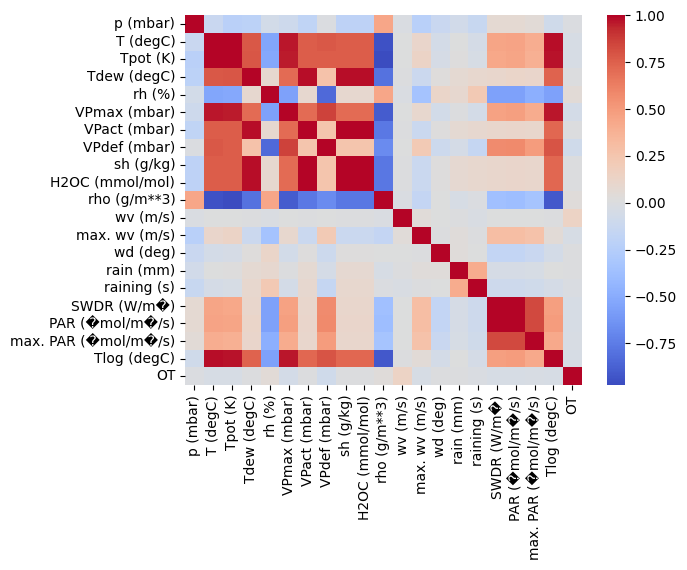

In [14]:
corr_matrix = weather.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

In [15]:
exchange.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,7588.0,0.776974,0.136620,0.483297,0.701422,0.761377,0.873477,1.102536
1,7588.0,1.634105,0.161544,1.211534,1.532887,1.606574,1.707646,2.109000
2,7588.0,0.821811,0.117123,0.618582,0.727901,0.811582,0.920394,1.091524
3,7588.0,0.848146,0.168874,0.548617,0.696864,0.813959,1.014018,1.374079
4,7588.0,0.142833,0.023996,0.109292,0.120814,0.145212,0.159948,0.237954
5,7588.0,0.009343,0.001458,0.006254,0.008331,0.009151,0.009995,0.013202
6,7588.0,0.669673,0.082836,0.523834,0.593287,0.662767,0.731835,0.832556
OT,7588.0,0.654418,0.115292,0.393153,0.566000,0.669187,0.734901,0.882379


/var/folders/lp/0n93b1qs0q7b31qkz96byfp00000gp/T/ipykernel_75496/782654654.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = exchange.corr()


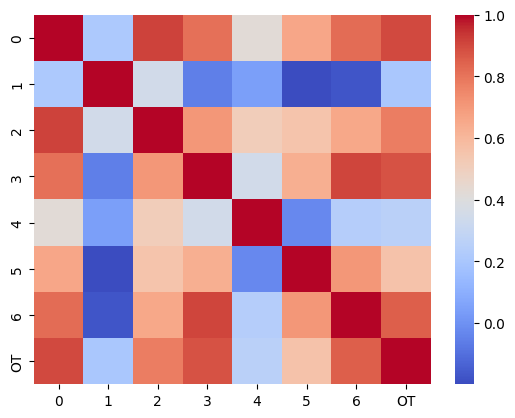

In [16]:
corr_matrix = exchange.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

In [17]:
air_quality.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PT08.S1(CO),8991.0,1099.833166,217.080037,647.0000,937.0000,1063.0000,1231.0000,2040.000
C6H6(GT),8991.0,10.083105,7.449820,0.1000,4.4000,8.2000,14.0000,63.700
PT08.S2(NMHC),8991.0,939.153376,266.831429,383.0000,734.5000,909.0000,1116.0000,2214.000
PT08.S3(NOx),8991.0,835.493605,256.817320,322.0000,658.0000,806.0000,969.5000,2683.000
PT08.S4(NO2),8991.0,1456.264598,346.206794,551.0000,1227.0000,1463.0000,1674.0000,2775.000
PT08.S5(O3),8991.0,1022.906128,398.484288,221.0000,731.5000,963.0000,1273.5000,2523.000
T,8991.0,18.317829,8.832116,-1.9000,11.8000,17.8000,24.4000,44.600
RH,8991.0,49.234201,17.316892,9.2000,35.8000,49.6000,62.5000,88.700
OT,8991.0,1.025530,0.403813,0.1847,0.7368,0.9954,1.3137,2.231


/var/folders/lp/0n93b1qs0q7b31qkz96byfp00000gp/T/ipykernel_75496/2830440111.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = air_quality.corr()


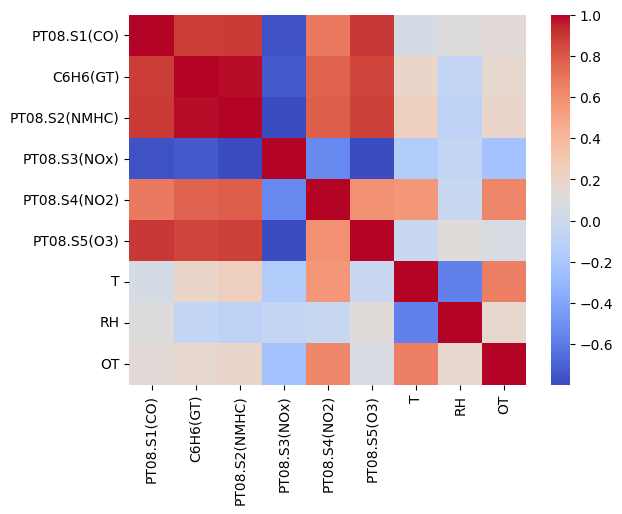

In [18]:
corr_matrix = air_quality.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

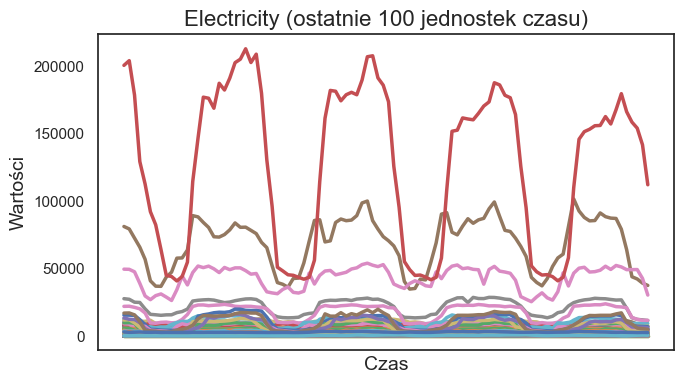

In [31]:
electricity_small = electricity.tail(100)
electricity_small.set_index("date", inplace=True)
plt.figure(figsize=(7, 4))
sns.set(style="white")
for column in electricity_small.columns:
    sns.lineplot(data=electricity_small[column], linewidth=2.5)
plt.title('Electricity (ostatnie 100 jednostek czasu)', fontsize=16)
plt.xlabel('Czas', fontsize=14)
plt.xticks([], [])
plt.ylabel('Wartości', fontsize=14)
plt.tight_layout()
plt.show()

In [40]:
electricity.describe().transpose().loc[electricity.describe().transpose()['mean']>25_000]

,count,mean,std,min,25%,50%,75%,max
155,26304.0,78701.088960,25939.340004,0.0,59252.0,79876.0,92543.0,203001.0
167,26304.0,25457.794138,7258.732814,0.0,18506.0,27061.0,29910.0,48843.0
236,26304.0,46173.426779,11504.974839,0.0,35527.0,49535.0,55491.0,78721.0
313,26304.0,200529.124848,146054.610575,0.0,69300.0,174000.0,267725.0,764000.0


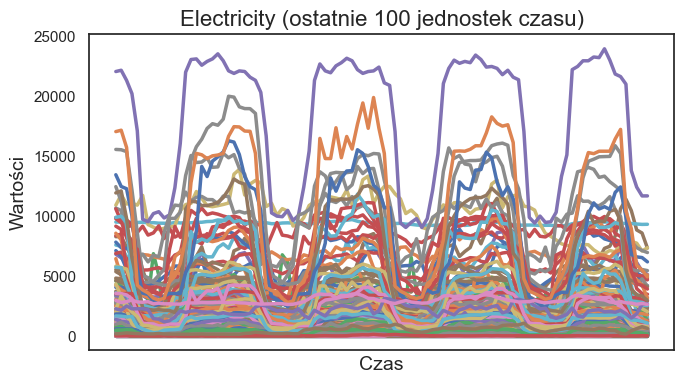

In [42]:
electricity_small = electricity.tail(100).drop(columns=["155","167","236","313"])
electricity_small.set_index("date", inplace=True)
plt.figure(figsize=(7, 4))
sns.set(style="white")
for column in electricity_small.columns:
    sns.lineplot(data=electricity_small[column], linewidth=2.5)
plt.title('Electricity (ostatnie 100 jednostek czasu)', fontsize=16)
plt.xlabel('Czas', fontsize=14)
plt.xticks([], [])
plt.ylabel('Wartości', fontsize=14)
plt.tight_layout()
plt.show()

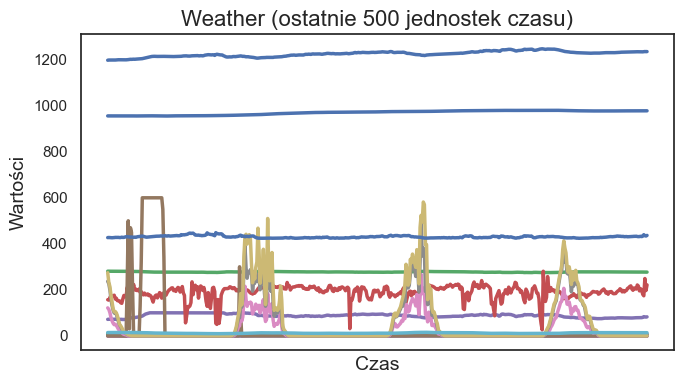

In [32]:
weather_small = weather.tail(500)
weather_small.set_index("date", inplace=True)
plt.figure(figsize=(7, 4))
sns.set(style="white")
for column in weather_small.columns:
    sns.lineplot(data=weather_small[column], linewidth=2.5)
plt.title('Weather (ostatnie 500 jednostek czasu)', fontsize=16)
plt.xlabel('Czas', fontsize=14)
plt.xticks([], [])
plt.ylabel('Wartości', fontsize=14)
plt.tight_layout()
plt.show()

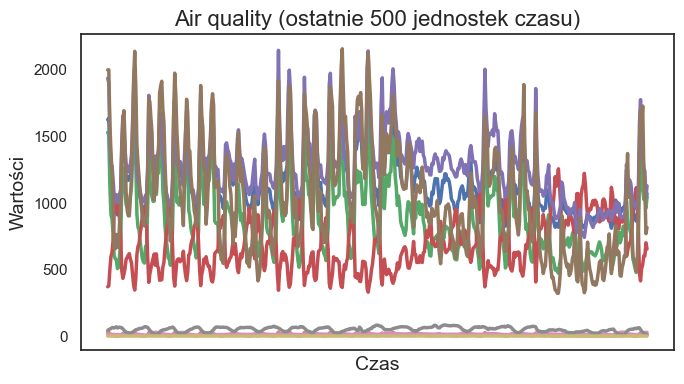

In [33]:
air_small = air_quality.tail(500)
air_small.set_index("date", inplace=True)
plt.figure(figsize=(7, 4))
sns.set(style="white")
for column in air_small.columns:
    sns.lineplot(data=air_small[column], linewidth=2.5)
plt.title('Air quality (ostatnie 500 jednostek czasu)', fontsize=16)
plt.xlabel('Czas', fontsize=14)
plt.xticks([], [])
plt.ylabel('Wartości', fontsize=14)
plt.tight_layout()
plt.show()

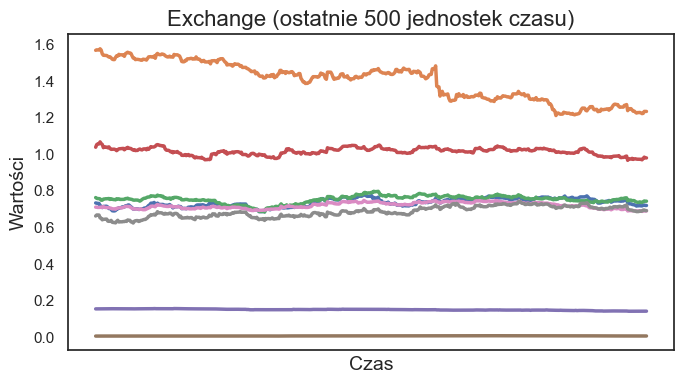

In [34]:
exchange_small = exchange.tail(500)
exchange_small.set_index("date", inplace=True)
plt.figure(figsize=(7, 4))
sns.set(style="white")
for column in exchange_small.columns:
    sns.lineplot(data=exchange_small[column], linewidth=2.5)
plt.title('Exchange (ostatnie 500 jednostek czasu)', fontsize=16)
plt.xlabel('Czas', fontsize=14)
plt.xticks([], [])
plt.ylabel('Wartości', fontsize=14)
plt.tight_layout()
plt.show()
